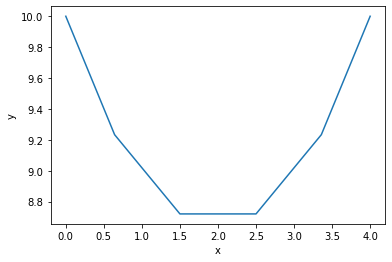

In [53]:
from numpy import zeros, linspace, dot, array,real, meshgrid, pi,append
import matplotlib.pyplot as plt
import sympy as sp
from numpy import linalg as LA
from IPython import get_ipython


n = 13
h = 0.001
l_01 = 1
l_12 = 1
l_23 = 1
l_34 = 1
l_45 = 1
m1 = 1
m2 = 1
m3 = 1
m4 = 1
x0 = 0
y0 = 10 
x5 = 4
y5 = 10

def S_01(X1):
    return (x0-X1[0])**2+(y0-X1[1])**2-l_01**2

def S_12(X1,X2):
    return (X1[0]-X2[0])**2+(X1[1]-X2[1])**2-l_12**2

def S_23(X2,X3):
    return (X2[0]-X3[0])**2+(X2[1]-X3[1])**2-l_23**2

def S_34(X3,X4):
    return (X3[0]-X4[0])**2+(X3[1]-X4[1])**2-l_34**2

def S_45(X4):
    return (X4[0]-x5)**2+(X4[1]-y5)**2-l_45**2

def U1(Y):
    return m1*g*Y[1]
def U2(Y):
    return m2*g*Y[1]
def U3(Y):
    return m3*g*Y[1]
def U4(Y):
    return m4*g*Y[1]

def U(X):
    X1=X[0:2]
    X2=X[2:4]
    X3=X[4:6]
    X4=X[6:8]
    L=X[8:13]
    return U1(X1) + U2(X2) + U3(X3) + U4(X4) + L[0]*S_01(X1) + L[1]*S_12(X1,X2) +L[2]*S_23(X2,X3) + L[3]*S_34(X3,X4)  + L[4]*S_45(X4)

def dF(X,h,i):
    dX=zeros(n)
    dX[i]=h
    return (U(X + dX)- U(X - dX))/h/2

def DU(X,h):
    H=zeros((n,n))
    for i in range(0,n):
        for j in range(0,n):
            dX=zeros(n)
            dX[j]=h
            H[i][j]=(dF(X + dX,h,i) - dF(X - dX,h,i))/2/h
    return H
m=80
Vf=zeros((m,n))
Vf[0]=[1,2,2,3,3,4,4,5,1,1,1,1,1]

for i in range(1,m):
    F=[dF(Vf[i-1],h,k) for k in range(n)]
    Vf[i]=Vf[i-1] - 0.5*LA.inv(DU(Vf[i-1],h)).dot(F)



a = zeros(6)
b = zeros(6)
a[0] = x0
b[0] = y0
a[1]=Vf[m-1][0]
b[1]=Vf[m-1][1]
a[2]=Vf[m-1][2]
b[2]=Vf[m-1][3]
a[3]=Vf[m-1][4]
b[3]=Vf[m-1][5]
a[4]=Vf[m-1][6]
b[4]=Vf[m-1][7]
a[5] = x5
b[5] = y5


plt.xlabel("x")
plt.ylabel("y")
plt.plot(a, b)